# Analyse Background

 work with Weakly_2023_01
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/02/04
- update : 2023/02/06 
- use jupyter kernel LSST



In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice

In [2]:
import matplotlib.dates as mdates

In [3]:
from collections import OrderedDict

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


# Config

In [6]:
!ls ../data_Tables

Table_icExpBackground_20230117.csv  Table_icSrc_20230117.csv
Table_icExpBackground_20230118.csv  Table_icSrc_20230118.csv
Table_icExpBackground_20230119.csv  Table_icSrc_20230119.csv
Table_icExpBackground_20230131.csv  Table_icSrc_20230131.csv
Table_icExpBackground_20230201.csv  Table_icSrc_20230201.csv
Table_icExpBackground_20230202.csv  Table_icSrc_20230202.csv


In [7]:
path = "../data_Tables"

In [8]:
date_to_file = OrderedDict( {
    20230117 :"Table_icExpBackground_20230117.csv",
    20230118 :"Table_icExpBackground_20230118.csv",
    20230119 :"Table_icExpBackground_20230119.csv",
    20230131 :"Table_icExpBackground_20230131.csv",
    20230201 :"Table_icExpBackground_20230201.csv",
    20230202 :"Table_icExpBackground_20230202.csv",
})

In [9]:
date_sel = 20230202

In [10]:
filename = date_to_file[date_sel]

In [11]:
fullfilename = os.path.join(path,filename)

# Read

In [12]:
df= pd.read_csv(fullfilename)

In [13]:
df

,Unnamed: 0,id,day_obs,seq_num,exposure,mjd,time,med,sig,N,band,physical_filter
0,0,0,20230201,632,2023020100632,59977.219134,2023-02-02 05:15:33.172,65.734464,13.000997,16288000.0,white,empty~holo4_003
1,1,1,20230201,578,2023020100578,59977.192610,2023-02-02 04:37:21.526,82.450613,14.454371,16288000.0,white,empty~holo4_003
2,2,2,20230201,472,2023020100472,59977.138642,2023-02-02 03:19:38.681,46.162452,11.794052,16288000.0,white,empty~holo4_003
3,3,3,20230201,530,2023020100530,59977.168927,2023-02-02 04:03:15.271,82.068171,15.673638,16288000.0,white,empty~holo4_003
4,4,4,20230201,623,2023020100623,59977.214692,2023-02-02 05:09:09.431,86.455249,17.319804,16288000.0,white,empty~holo4_003
...,...,...,...,...,...,...,...,...,...,...,...,...
63,63,63,20230201,597,2023020100597,59977.200799,2023-02-02 04:49:09.076,77.584937,13.910326,16288000.0,white,empty~holo4_003
64,64,64,20230201,405,2023020100405,59977.106865,2023-02-02 02:33:53.163,52.422197,9.797952,16288000.0,white,empty~holo4_003
65,65,65,20230201,508,2023020100508,59977.157309,2023-02-02 03:46:31.492,54.023033,14.383790,16288000.0,white,empty~holo4_003
66,66,66,20230201,471,2023020100471,59977.138147,2023-02-02 03:18:55.864,46.294366,11.824970,16288000.0,white,empty~holo4_003


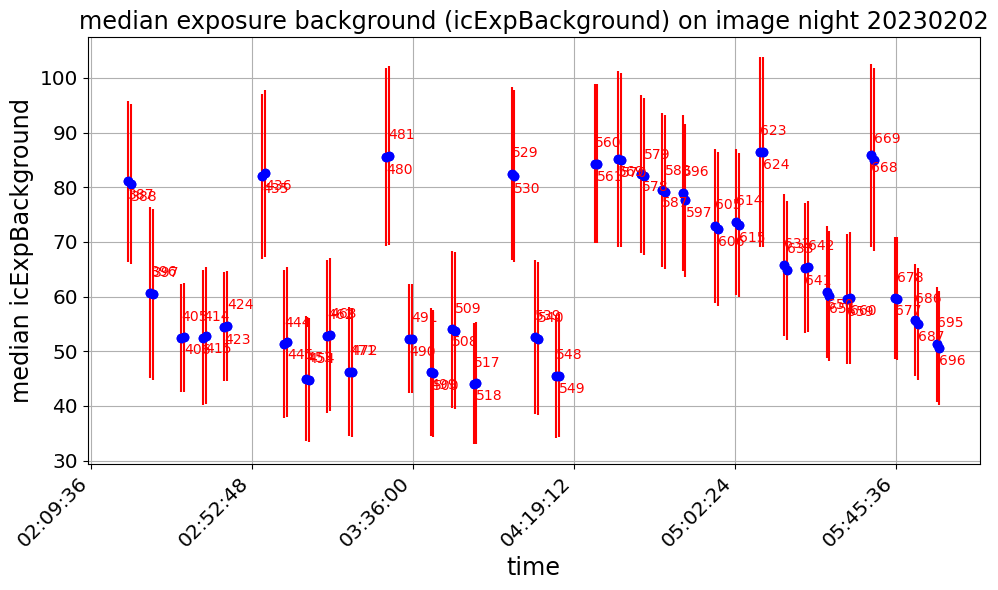

In [15]:
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
the_x = pd.to_datetime(df.time)
ax.plot(the_x,df.med,'o',color="b")
ax.errorbar(the_x,df.med,yerr=df.sig,fmt='o',color="b",ecolor="r")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.grid()
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
the_title = f"median exposure background (icExpBackground) on image night {date_sel}"
ax.set_title(the_title)
ax.set_xlabel("time")
ax.set_ylabel("median icExpBackground")

#ax2 = ax.twiny()
#ax2.plot(df.seq_num,df.med,'o',color="b")
#ax.errorbar(df.seq_num,df.med,yerr=df.sig,fmt='o',color="b",ecolor="r")

ylim = ax.get_ylim()
scale= ylim[-1]- ylim[0]
dyscale=scale/25

idx=0
for x, y in zip(the_x,df.med):
    the_seqnum=df.iloc[idx].seq_num
    if idx%2==0:
        plt.text(x, y+dyscale, str(the_seqnum), color="red", fontsize=10)
    else:
        plt.text(x, y-dyscale, str(the_seqnum), color="red", fontsize=10)
    idx+=1


plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=6)
figfilename=f"fig_icExpBackground_{date_sel}.png"
plt.tight_layout()



plt.savefig(figfilename)
plt.show()